#### <h1> <center> ENGG680 </center></h1>
<h2> <center> Project (47 points)</center></h2>
<center>
<div class="alert alert-block alert-info">
Due: Friday April 22 (midnight). To be submitted on D2L.
</div></center>

Edit this file and write your solutions to the problems in sections specified with `# Your solution goes here`. Test your code and when you were done, download this notebook as an `.ipynb` file and submit it to D2L. To get this file, in Jupyter notebook you can go to File -> Download as -> Notebook(.ipynb)

# Accident Prediction
The goal of this project is to get familiar with data wrangling and prepare a machine learning model to have an inital prediction by using real world data set.

Two data set of accident information of Calgary (Traffic_Incidents.csv) and (weather.csv) are given for this prediction.


### Import Traffic_Incidents.csv and set START_DT in csv file as index (1 pts)

In [23]:
# Your solution goes here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_incidents = pd.read_csv('Traffic_Incidents.csv')
data_incidents['START_DT'] = pd.to_datetime(data_incidents['START_DT'])
data_incidents = data_incidents.set_index('START_DT')
data_incidents

,INCIDENT INFO,DESCRIPTION,MODIFIED_DT,QUADRANT,Longitude,Latitude,Count,id,Point
START_DT,,,,,,,,,
2022-01-31 17:43:04,Eastbound 16 Avenue approaching 19 Street NE,Traffic incident. Blocking a centre lane,2022/01/31 05:44:30 PM,NE,-114.014809,51.066880,1,2022-01-31T17:43:0451.06687980348472-114.01480...,POINT (-114.01480888026677 51.06687980348472)
2022-03-11 17:31:13,Southbound Sarcee Trail at Richmond Road SW,Two vehicle incident. All lanes have reopened,2022/03/11 06:19:20 PM,SW,-114.165814,51.018483,1,2022-03-11T17:31:1351.01848282277337-114.16581...,POINT (-114.16581406053487 51.01848282277337)
2022-01-31 17:43:04,Eastbound 16 Avenue approaching 19 Street NE,Traffic incident. Blocking the right lanes,2022/01/31 05:52:56 PM,NE,-114.014441,51.066894,1,2022-01-31T17:43:0451.066893513842864-114.0144...,POINT (-114.01444107015365 51.066893513842864)
2022-02-24 18:39:51,32 Avenue and 4 Street NW,Traffic incident.,2022/02/24 07:17:02 PM,NW,-114.071537,51.081513,1,2022-02-24T18:39:5151.08151267480019-114.07153...,POINT (-114.07153734738591 51.08151267480019)
2022-03-29 19:18:43,60 Street and 96 Avenue NE,Traffic incident.,2022/03/29 07:19:36 PM,NE,-113.946849,51.139611,1,2022-03-29T19:18:4351.13961051521839-113.94684...,POINT (-113.9468490923995 51.13961051521839)
...,...,...,...,...,...,...,...,...,...
2018-04-24 19:51:23,52 Street and Mahogany Gate SE,Two vehicle incident.,2018/04/24 08:09:28 PM,SE,-113.944675,50.899524,1,2018-04-24T18:51:2350.8995235089559-113.944674...,POINT (-113.944674703854 50.8995235089559)
2018-05-23 19:27:49,17 Avenue and 29 Street SW,Two vehicle incident.,2018/05/23 08:24:18 PM,SW,-114.129546,51.037805,1,2018-05-23T18:27:4951.0378050478859-114.129546...,POINT (-114.129546341432 51.0378050478859)
2018-03-13 19:40:11,Southbound Centre Street and 18 Avenue NE,Two vehicle incident. Blocking the right lane,2018/03/13 08:04:56 PM,NE,-114.062512,51.068800,1,2018-03-13T18:40:1151.0688000493135-114.062511...,POINT (-114.062511772133 51.0688000493135)


### Filter "INCIDENT INFO" (i.e. only keep ICIDENT INFO column and drop other columns from dataframe) (1 pts)

In [25]:
# Your solution goes here

data_incidents = data_incidents[['INCIDENT INFO']]
data_incidents

,INCIDENT INFO
START_DT,
2022-01-31 17:43:04,Eastbound 16 Avenue approaching 19 Street NE
2022-03-11 17:31:13,Southbound Sarcee Trail at Richmond Road SW
2022-01-31 17:43:04,Eastbound 16 Avenue approaching 19 Street NE
2022-02-24 18:39:51,32 Avenue and 4 Street NW
2022-03-29 19:18:43,60 Street and 96 Avenue NE
...,...
2018-04-24 19:51:23,52 Street and Mahogany Gate SE
2018-05-23 19:27:49,17 Avenue and 29 Street SW
2018-03-13 19:40:11,Southbound Centre Street and 18 Avenue NE


### Check and drop null values from dataset if exist (1 pts)

In [3]:
# Your solution goes here

data_incidents = data_incidents.dropna()
print(data_incidents)

                                                         INCIDENT INFO
START_DT                                                              
2022-01-31 17:43:04      Eastbound 16 Avenue approaching 19 Street NE 
2022-03-11 17:31:13       Southbound Sarcee Trail at Richmond Road SW 
2022-01-31 17:43:04      Eastbound 16 Avenue approaching 19 Street NE 
2022-02-24 18:39:51                         32 Avenue and 4 Street NW 
2022-03-29 19:18:43                        60 Street and 96 Avenue NE 
...                                                                ...
2018-04-24 19:51:23                     52 Street and Mahogany Gate SE
2018-05-23 19:27:49                         17 Avenue and 29 Street SW
2018-03-13 19:40:11          Southbound Centre Street and 18 Avenue NE
2022-01-13 14:54:04   Eastbound Memorial Drive approaching Deerfoot...
2022-01-13 15:18:52              Memorial Drive and Deerfoot Trail SE 

[31107 rows x 1 columns]


### plot daily accident counts (3 Pts)

In [26]:
# Your solution goes here

#main
counts = data_incidents.groupby(data_incidents.index.date)['INCIDENT INFO'].count()

# data['day'] = data.index.date
# counts = data.groupby(data.index.date)['INCIDENT INFO'].count()
daily_counts_df = pd.DataFrame(counts)
# print(counts)
# print(counts_df)
# counts.info()
daily_counts_df

,INCIDENT INFO
2016-12-06,11
2016-12-07,24
2016-12-08,27
2016-12-09,41
2016-12-10,40
...,...
2022-03-30,13
2022-03-31,19
2022-04-01,15
2022-04-02,11


In [5]:
# # print(data)
# data.resample('D').size().plot(kind="line", figsize=(15, 10))

# # data_daily = data.resample('d').sum()
# # data_daily.head()

Text(0, 0.5, 'Daily counts')

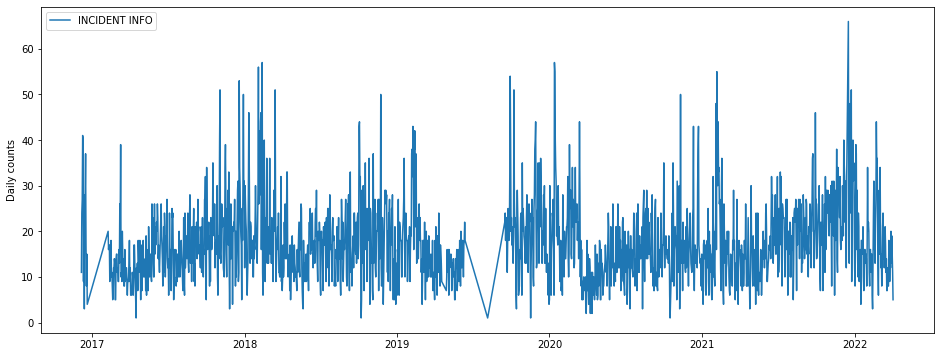

In [27]:
daily_counts_df.plot(kind='line', figsize=(16,6))
plt.ylabel("Daily counts")

In [7]:
# new_df = sz.to_frame(name = 'count').reset_index()
# new_df.rename( columns={ "level_0" : "ST_DT" } ,inplace=True)
# # new_df
# # sz_1 = new_df.groupby(["ST_DT"]).size()
# # sz_2 = sz_1.to_frame(name = 'count').reset_index()
# # sz_2


# new_df["ST_DT"] = new_df["ST_DT"].astype("datetime64")
# new_df.groupby(new_df["ST_DT"].dt.isocalendar().week).count().plot(kind="bar")

### plot weekly accident counts (3 Pts)

In [28]:
# Your solution goes here

# print(data)
# data.resample('W').size().plot.bar(figsize=(60, 40))
data_incidents['week-year'] = data_incidents.index.isocalendar().week.astype(str) + "-"+ data_incidents.index.isocalendar().year.astype(str)  
#                                 
data_incidents

,INCIDENT INFO,week-year
START_DT,,
2022-01-31 17:43:04,Eastbound 16 Avenue approaching 19 Street NE,5-2022
2022-03-11 17:31:13,Southbound Sarcee Trail at Richmond Road SW,10-2022
2022-01-31 17:43:04,Eastbound 16 Avenue approaching 19 Street NE,5-2022
2022-02-24 18:39:51,32 Avenue and 4 Street NW,8-2022
2022-03-29 19:18:43,60 Street and 96 Avenue NE,13-2022
...,...,...
2018-04-24 19:51:23,52 Street and Mahogany Gate SE,17-2018
2018-05-23 19:27:49,17 Avenue and 29 Street SW,21-2018
2018-03-13 19:40:11,Southbound Centre Street and 18 Avenue NE,11-2018


Text(0, 0.5, 'Weekly count')

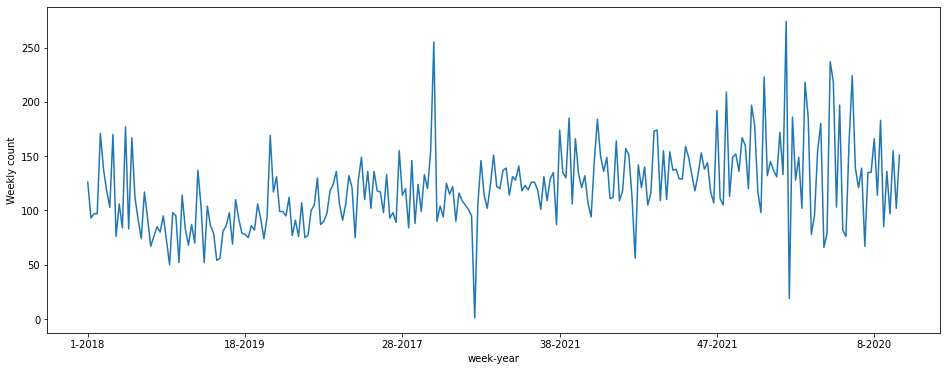

In [29]:
counts_weekly = data_incidents.groupby(data_incidents['week-year'])['INCIDENT INFO'].count()
counts_weekly.plot(kind='line', figsize=(16,6))
plt.ylabel("Weekly count")

### plot the average traffic as a function of the time of the day and explain your observation ( 6 pts: 4 pts code + 2 pts your observation)

Text(0, 0.5, 'Hourlyyyy ')

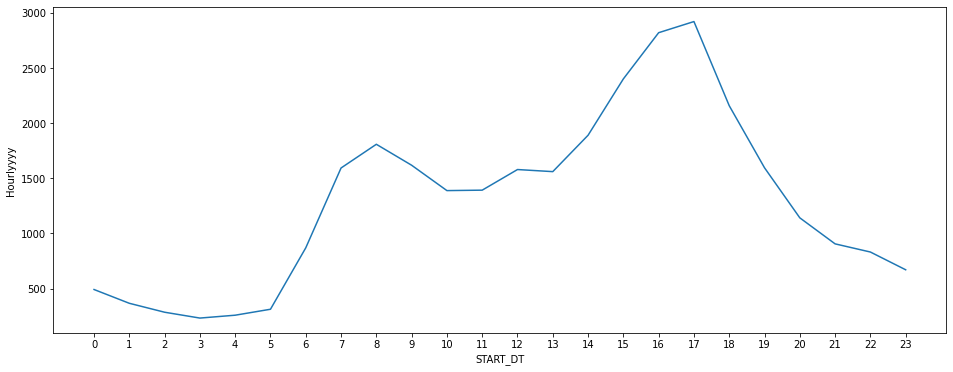

In [30]:


hourly_ticks = np.arange(24)
counts_hr = data_incidents.groupby(data_incidents.index.hour)['INCIDENT INFO'].count()
counts_hr.plot(xticks=hourly_ticks, kind="line",figsize=(16,6))
plt.ylabel("Hourlyyyy ")
# plt.xticks(rotation="vertical")

### Plot the average traffic to see how things change based on the day of the week and explain your observation ( 6 pts: 4 pts code + 2 pts your observation)

Text(0, 0.5, 'every day ')

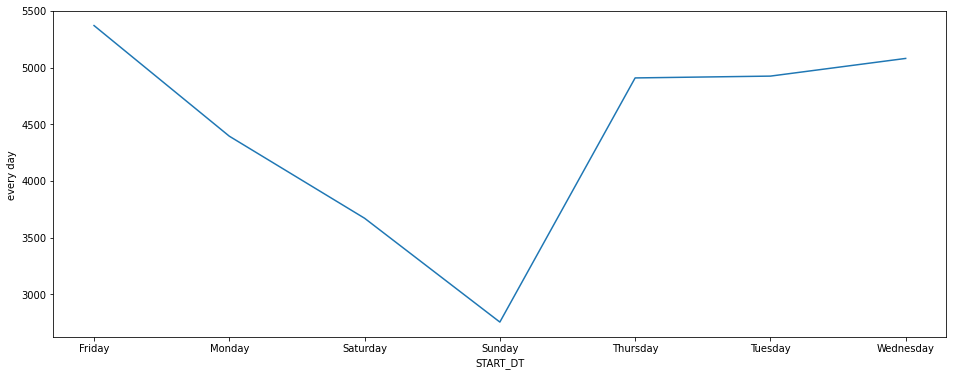

In [59]:
# Your solution goes here

counts_wkd = data_incidents.groupby(data_incidents.index.day_name())['INCIDENT INFO'].count()
counts_wkd.plot(kind="line",figsize=(16,6))
plt.ylabel("every day ")

START_DT
Friday       5371
Monday       4395
Saturday     3671
Sunday       2755
Thursday     4909
Tuesday      4925
Wednesday    5081
Name: INCIDENT INFO, dtype: int64


Text(0, 0.5, 'every day ')

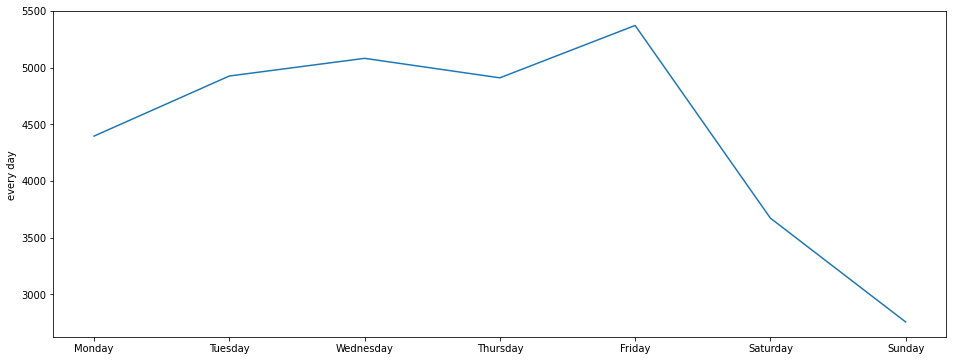

In [60]:
##############################################################################
####### As change suggested by Arunav
##############################################################################


print(counts_wkd)
days_1 = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

counts_wkd.index = pd.Categorical(counts_wkd.index, categories=days_1, ordered=True) 
counts_wkd = counts_wkd.sort_index()
counts_wkd.plot(kind="line",figsize=(16,6))
plt.ylabel("every day ")

In [12]:
# data_incidents_wk1 = data_incidents[data_incidents.index.dayofweek>4]
# data_incidents_wk1

In [13]:


# # weekdays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
# # for i in range(7):
# #     counts_df[weekdays[i]] = (counts_df.index.dt.day_name() == i).astype(int)
# # counts_df.head(7)
# daily_counts_df.index.inferred_type
# cond = np.where(data_incidents.index.dayofweek<5)
# g = data_incidents_wk.groupby(data_incidents_wk.index.hour)['INCIDENT INFO'].count()
# g

### plot the hourly trend between weekdays and weekends and explain your observation ( 8 pts: 6 pts code and 2 pts your observation)

Text(0, 0.5, 'Incidents')

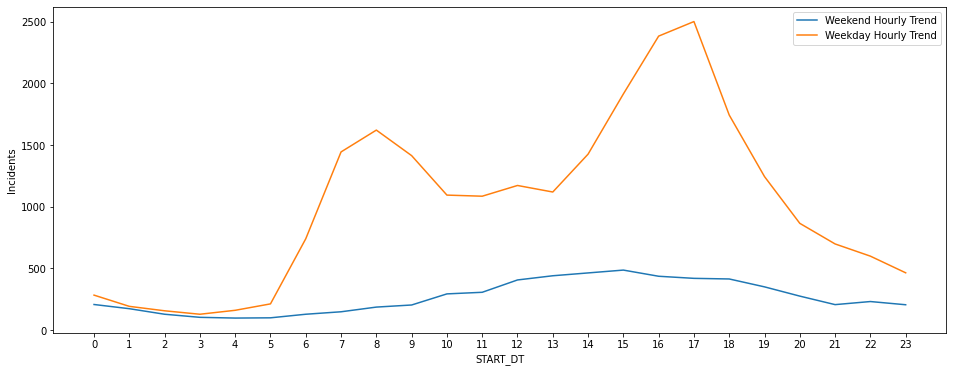

In [14]:

fig, ax = plt.subplots()
hourly_ticks = np.arange(24)

data_incidents_weekdays = data_incidents[data_incidents.index.dayofweek<5]
data_incidents_weekends = data_incidents[data_incidents.index.dayofweek>4]

counts_hourly_weekday = data_incidents_weekdays.groupby(data_incidents_weekdays.index.hour)['INCIDENT INFO'].count()
counts_hourly_weekend = data_incidents_weekends.groupby(data_incidents_weekends.index.hour)['INCIDENT INFO'].count()

counts_hourly_weekend.plot(xticks=hourly_ticks, kind="line",figsize=(16,6), ax=ax)
counts_hourly_weekday.plot(xticks=hourly_ticks, kind="line",figsize=(16,6), ax=ax)

# plt.legend()
ax.legend(["Weekend Hourly Trend", "Weekday Hourly Trend"])
plt.ylabel("Incidents")
# plt.show()

# Merging Datasets

### Load Daily weather data (weather.csv) (1 pts)

In [15]:
# Your solution goes here

data_weather = pd.read_csv('weather.csv')
data_weather['date'] = pd.to_datetime(data_weather['date']).dt.date
data_weather

,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
0,2022-04-02,11.7,3.19,4.84,-2.0,NaN,-5.0,92,57.1,57.0,...,NaN,NaN,8,5.9,4.0,0,NaN,NaN,NaN,NaN
1,2022-04-01,9.4,3.25,2.95,-3.5,NaN,-5.0,70,44.0,47.5,...,NaN,NaN,8,5.2,4.0,0,NaN,NaN,NaN,NaN
2,2022-03-31,8.1,3.55,4.25,0.4,NaN,NaN,90,48.4,56.0,...,NaN,NaN,8,7.2,6.5,5,NaN,NaN,NaN,NaN
3,2022-03-30,17.7,6.59,7.10,-3.5,NaN,-6.0,90,48.1,53.5,...,NaN,NaN,8,5.8,4.0,0,NaN,NaN,NaN,NaN
4,2022-03-29,10.4,2.05,1.95,-6.5,NaN,-7.0,94,61.8,59.0,...,NaN,NaN,8,3.1,4.5,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2014-01-19,6.6,1.44,2.29,-2.0,NaN,-7.0,61,51.3,48.5,...,NaN,NaN,7,3.4,4.0,1,NaN,NaN,NaN,NaN
2996,2014-01-18,12.8,4.65,4.30,-4.2,NaN,-9.0,81,49.3,53.5,...,NaN,NaN,6,1.9,3.5,1,NaN,NaN,NaN,NaN
2997,2014-01-17,9.8,5.34,4.65,-0.5,NaN,-3.0,74,49.5,53.0,...,NaN,NaN,8,3.7,4.5,1,NaN,NaN,NaN,NaN
2998,2014-01-16,9.1,2.12,2.90,-3.3,NaN,-7.0,69,52.8,53.0,...,NaN,NaN,8,4.8,5.0,2,NaN,NaN,NaN,NaN


### Extract maximum/minimum temperature and drop Null values (1 pts)

In [16]:
# Your solution goes here
data_weather_maxTemp = data_weather['max_temperature']
data_weather_minTemp = data_weather['min_temperature']

data_weather_maxTemp.dropna(inplace = True)
data_weather_minTemp.dropna(inplace = True)

print(data_weather_maxTemp)
print(data_weather_minTemp)

0       11.7
1        9.4
2        8.1
3       17.7
4       10.4
        ... 
2995     6.6
2996    12.8
2997     9.8
2998     9.1
2999     9.0
Name: max_temperature, Length: 3000, dtype: float64
0      -2.0
1      -3.5
2       0.4
3      -3.5
4      -6.5
       ... 
2995   -2.0
2996   -4.2
2997   -0.5
2998   -3.3
2999   -0.3
Name: min_temperature, Length: 3000, dtype: float64


### Add the following daily features and create your feature matrix: (10 pts)
* X: Weekdays, average daily temperature
* Y: Total number of accidents in that day

In [17]:
data_weather = data_weather.set_index('date')

In [18]:
data_merged = pd.merge(daily_counts_df, data_weather, left_index=True, right_index=True)
# data_merged_1 = pd.merge(daily_counts_df, data_weather, left_index=True, right_index=True)

In [19]:
data_merged = data_merged[['INCIDENT INFO', 'avg_temperature']]
data_merged

,INCIDENT INFO,avg_temperature
2016-12-06,11,-19.79
2016-12-07,24,-21.80
2016-12-08,27,-23.25
2016-12-09,41,-22.29
2016-12-10,40,-20.95
...,...,...
2022-03-29,20,1.95
2022-03-30,13,7.10
2022-03-31,19,4.25
2022-04-01,15,2.95


In [20]:
data_merged.index = pd.to_datetime(data_merged.index)
# data_new.index.inferred_type

weekdays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
for i in range(7):
    data_merged[weekdays[i]] = (data_merged.index.weekday == i).astype(int)
data_merged = data_merged.dropna()
data_merged

,INCIDENT INFO,avg_temperature,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2016-12-06,11,-19.79,0,1,0,0,0,0,0
2016-12-07,24,-21.80,0,0,1,0,0,0,0
2016-12-08,27,-23.25,0,0,0,1,0,0,0
2016-12-09,41,-22.29,0,0,0,0,1,0,0
2016-12-10,40,-20.95,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
2022-03-29,20,1.95,0,1,0,0,0,0,0
2022-03-30,13,7.10,0,0,1,0,0,0,0
2022-03-31,19,4.25,0,0,0,1,0,0,0
2022-04-01,15,2.95,0,0,0,0,1,0,0


### Create your model and use linearRegression class in sklearn for prediction (3 pts)

In [21]:
# Your solution goes here

X = data_merged.iloc[:, 1:].values
Y = data_merged.iloc[:, 0].values

# print(X)
# print(Y)

from sklearn.linear_model import LinearRegression
# # creating an object of LinearRegression class


# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# ct = ColumnTransformer([('encoder', OneHotEncoder(), [1,2,3,4,5,6,7])], remainder='passthrough')
# X = np.array(ct.fit_transform(X), dtype=float)

LR = LinearRegression()
# # fitting the training data
LR.fit(X,Y)

predicted = LR.predict(X)

# print(predicted)

data_merged['predicted'] = predicted
data_merged


,INCIDENT INFO,avg_temperature,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,predicted
2016-12-06,11,-19.79,0,1,0,0,0,0,0,24.266935
2016-12-07,24,-21.80,0,0,1,0,0,0,0,25.351538
2016-12-08,27,-23.25,0,0,0,1,0,0,0,25.079327
2016-12-09,41,-22.29,0,0,0,0,1,0,0,26.860064
2016-12-10,40,-20.95,0,0,0,0,0,1,0,19.860889
...,...,...,...,...,...,...,...,...,...,...
2022-03-29,20,1.95,0,1,0,0,0,0,0,19.542617
2022-03-30,13,7.10,0,0,1,0,0,0,0,19.071282
2022-03-31,19,4.25,0,0,0,1,0,0,0,19.103305
2022-04-01,15,2.95,0,0,0,0,1,0,0,21.375162


### plot and compare your prediction with real accident data (3 pts)

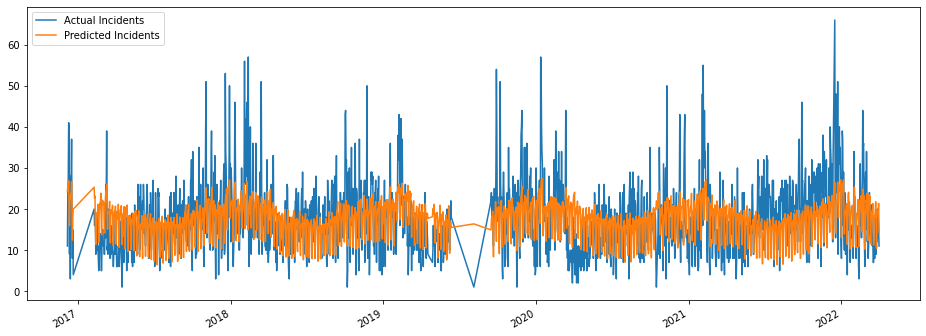

In [22]:
# Your solution goes here


data_merged['INCIDENT INFO'].plot(kind='line', figsize=(16,6))
data_merged['predicted'].plot(kind='line', figsize=(16,6))
plt.legend(['Actual Incidents','Predicted Incidents'])